## Import Libraries

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

## Load the Data

In [3]:
df = pd.read_csv('final_data.csv')
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [4]:
df.shape

(10754, 22)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

Consistency


In [5]:
df['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [6]:
#Unify the values in the position column based on the four categories: Goalkeeper, Defender, Midfield, Attack.
df.loc[df['position'] == 'Defender Centre-Back', 'position'] = 'Defender'
df.loc[df['position'] == 'Defender Left-Back', 'position'] = 'Defender'
df.loc[df['position'] == 'Defender Right-Back', 'position'] = 'Defender'
df.loc[df['position'] == 'midfield-DefensiveMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield-CentralMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield-AttackingMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield-LeftMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield-RightMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'Attack Centre-Forward', 'position'] = 'Attack'
df.loc[df['position'] == 'Attack-RightWinger', 'position'] = 'Attack'
df.loc[df['position'] == 'Attack-LeftWinger', 'position'] = 'Attack'
df.loc[df['position'] == 'Attack-SecondStriker', 'position'] = 'Attack'

In [7]:
df['position'].unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Attack'], dtype=object)

Irrelevant columns

In [8]:
#drop irrelevant columns
df.drop(columns= 'player', inplace = True)
df.drop(columns= 'name', inplace = True)
df.drop(columns= 'position_encoded', inplace = True)

Uniqeness

In [9]:
df[df.duplicated()]

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger


Completeness

In [10]:
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
winger                 0
dtype: int64

 Check Accuracy

In [11]:
# columns types
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

Outlier

In [12]:
#I won't handle outliers manually; I will try to use RobustScaler to manage them

In [13]:
# Convert categorical variables using OneHotEncoding
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
                    'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 
                    'highest_value', 'winger']

In [14]:
#Understand categorical features Distribution
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64
position
Defender      3528
Midfielder    3095
Attack        2902
Goalkeeper    1229
Name: count, dtype: int64


array([[<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'appearance'}>,
        <Axes: title={'center': 'goals'}>],
       [<Axes: title={'center': 'assists'}>,
        <Axes: title={'center': 'yellow cards'}>,
        <Axes: title={'center': 'second yellow cards'}>,
        <Axes: title={'center': 'red cards'}>],
       [<Axes: title={'center': 'goals conceded'}>,
        <Axes: title={'center': 'clean sheets'}>,
        <Axes: title={'center': 'minutes played'}>,
        <Axes: title={'center': 'days_injured'}>],
       [<Axes: title={'center': 'games_injured'}>,
        <Axes: title={'center': 'award'}>,
        <Axes: title={'center': 'current_value'}>,
        <Axes: title={'center': 'highest_value'}>],
       [<Axes: title={'center': 'winger'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

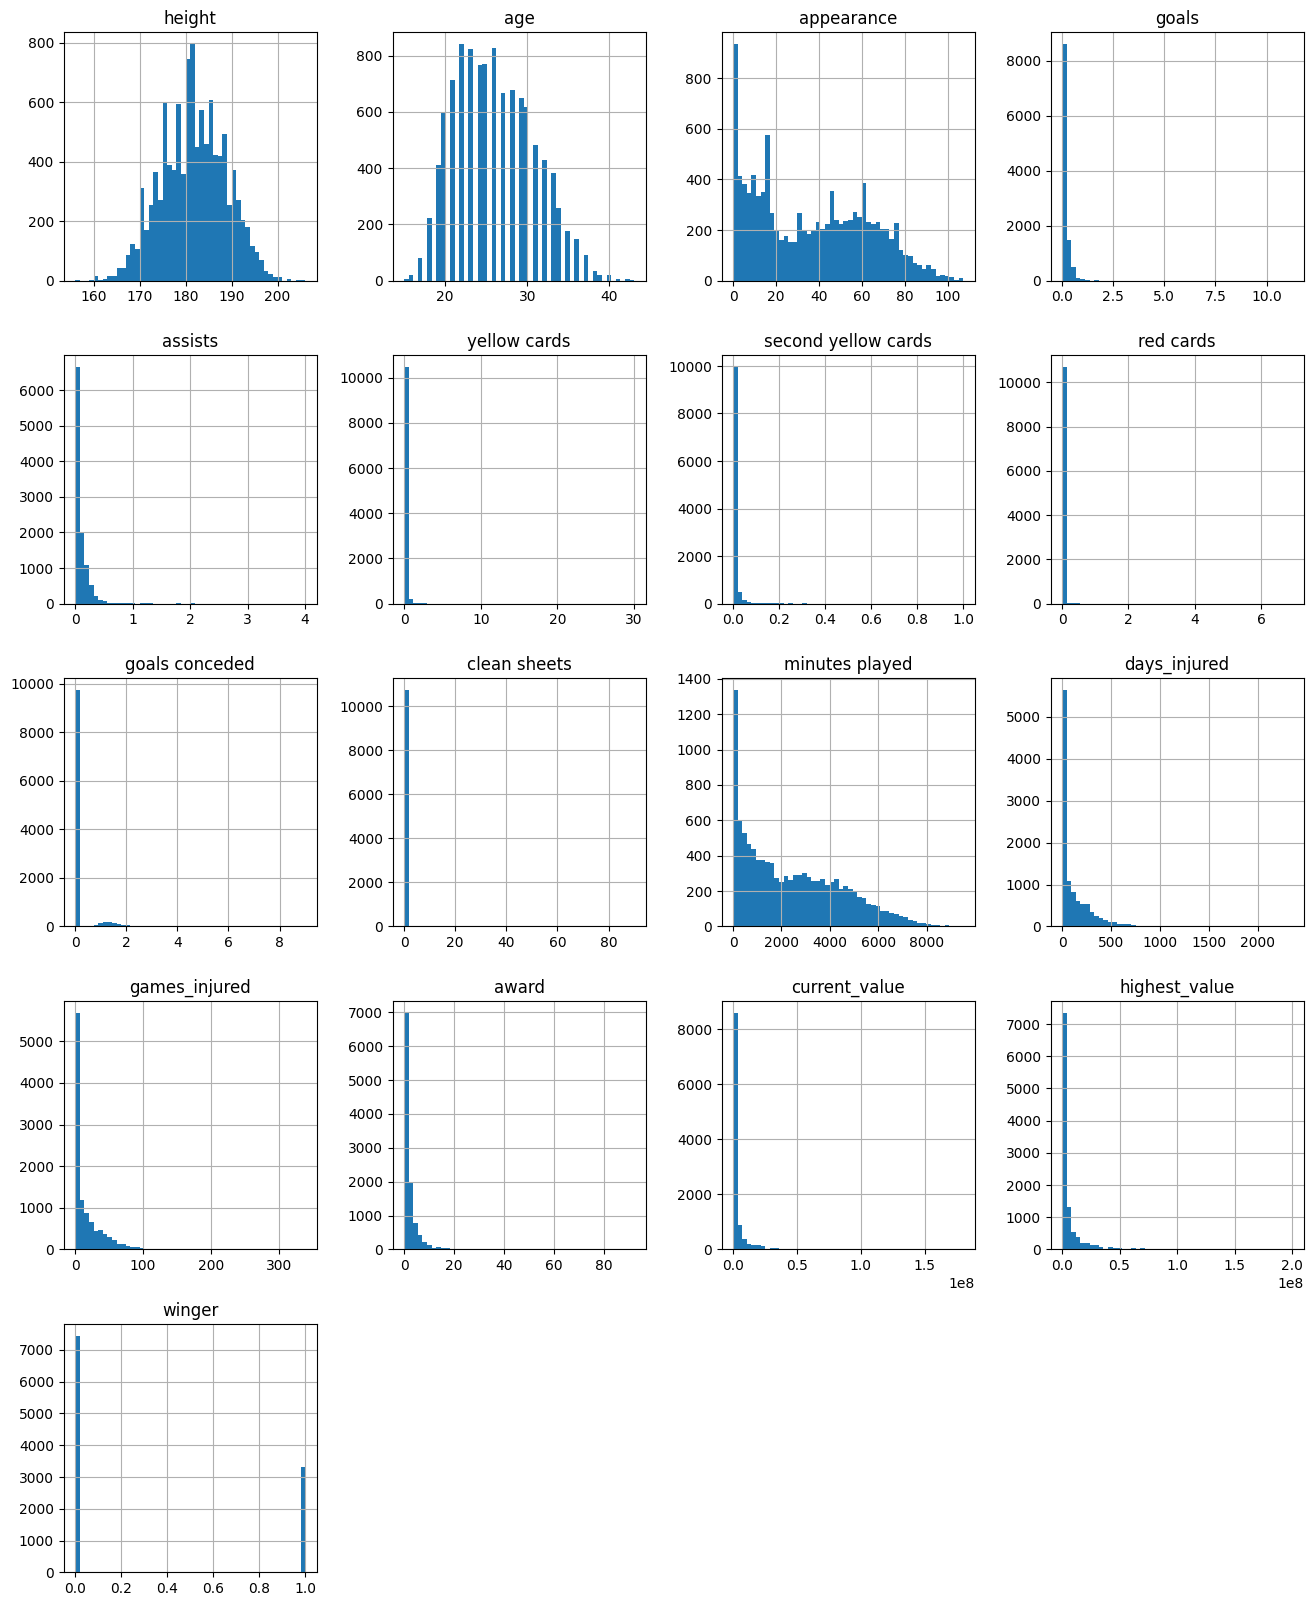

In [15]:
#Visualize numeric features to Understand the Distribution
df[numeric_features].hist(figsize=(16, 20), bins=50)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [16]:
#Convert the column to its previous number before scaling and save it in a new column.
multiply = ['goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets']

for column in multiply:
    name = column.replace(' ', '_') + '_total'  
    df[name] = (df[column] * df['appearance']).astype(int)


In [17]:
df.shape

(10754, 26)

In [18]:
df.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'winger', 'goals_total',
       'assists_total', 'yellow_cards_total', 'second_yellow_cards_total',
       'red_cards_total', 'goals_conceded_total', 'clean_sheets_total'],
      dtype='object')

In [19]:
# Create a binary column 
df['has_award'] = df['award'].apply(lambda x: 1 if x > 0 else 0)
df['has_clean sheets'] = df['clean_sheets_total'].apply(lambda x: 1 if x > 0 else 0)
df['has_second_yellow _ards'] = df['second_yellow_cards_total'].apply(lambda x: 1 if x > 0 else 0)
df['has__yellow _ards'] = df['yellow_cards_total'].apply(lambda x: 1 if x > 0 else 0)
df['has_red_cards'] = df['red_cards_total'].apply(lambda x: 1 if x > 0 else 0)
df['has_conceded_goals'] = df['goals_conceded_total'].apply(lambda x: 1 if x > 0 else 0)
df['never_injured'] = df['days_injured'].apply(lambda x: 1 if x > 0 else 0)
df['never_play'] = df['appearance'].apply(lambda x: 1 if x > 0 else 0)
df['Score'] = df['goals_total'].apply(lambda x: 1 if x > 0 else 0)
df['has_assists'] = df['assists_total'].apply(lambda x: 1 if x > 0 else 0)


In [20]:
df.shape

(10754, 36)

In [21]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,...,has_award,has_clean sheets,has_second_yellow _ards,has__yellow _ards,has_red_cards,has_conceded_goals,never_injured,never_play,Score,has_assists
0,Manchester United,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,...,1,1,0,0,0,1,1,1,0,0
1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,...,1,1,0,1,0,1,1,1,0,0


One hot coding


In [22]:
categorical_features

['team', 'position']

In [23]:
df = pd.get_dummies(df, columns=categorical_features)

In [24]:
df.shape

(10754, 412)

In [25]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,position_Attack,position_Defender,position_Goalkeeper,position_Midfielder
0,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,False,False,False,False,False,True,False
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,False,True,False


In [26]:
df['current_value'].median()

800000.0

In [27]:
#To know if the current_value is high or not I will use median

# Create a new column with binary classification based on median
df['current_value_bi'] = (df['current_value'] > df['current_value'].median()).astype(int)

In [28]:
df.head(5)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,position_Attack,position_Defender,position_Goalkeeper,position_Midfielder,current_value_bi
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,...,False,False,False,False,False,False,False,True,False,1
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,True,False,1
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,False,False,False,False,True,False,0
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,True,False,False,1
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,True,False,False,1


#### 3. Feature selection

In [29]:
correlation = df.corr(numeric_only=True)
#print(correlation['Price'].sort_values(ascending=False))
print(correlation['current_value_bi'].sort_values(ascending=False))

current_value_bi             1.000000
appearance                   0.477686
minutes played               0.449583
highest_value                0.396422
current_value                0.377175
                               ...   
team_Daejeon Hana Citizen   -0.062843
has_clean sheets            -0.087994
has_conceded_goals          -0.102094
goals conceded              -0.112257
position_Goalkeeper         -0.150170
Name: current_value_bi, Length: 413, dtype: float64


In [30]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value_bi']) > \
threshold]['current_value_bi'].index
selected_features

Index(['appearance', 'minutes played', 'games_injured', 'award',
       'current_value', 'highest_value', 'goals_total', 'assists_total',
       'yellow_cards_total', 'has_award', 'has__yellow _ards', 'never_injured',
       'Score', 'has_assists', 'current_value_bi'],
      dtype='object')

In [31]:
#Now, let's see the selected features and filter out multicollinearity.

In [32]:
#First, let's see the correlation between the columns.
df_num= df.select_dtypes(include=['number'])
correlation = df_num.corr()

In [33]:
import plotly.express as px

fig = px.imshow(correlation, text_auto=True, color_continuous_scale='Viridis')
fig.update_layout(
    width=800,  
    height=600,  
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickvals=list(correlation.columns), ticktext=list(correlation.columns)),
    yaxis=dict(tickvals=list(correlation.columns), ticktext=list(correlation.columns)))

In [34]:
'''
'appearance' and 'minutes played' have high correlation; I will keep 'appearance.
'games_injured' and 'never_injured' have high correlation; I will keep 'games_injured'.
'award' and 'has_award' have high correlation; I will keep 'award'.
'goals_total' and 'Score' have high correlation; I will keep 'goals_total'.
'assists_total' and 'has_assists' have high correlation; I will keep 'assists_total'.
'yellow_cards_total' and 'has__yellow _ards' have high correlation; I will keep 'yellow_cards_total'.
'''

"\n'appearance' and 'minutes played' have high correlation; I will keep 'appearance.\n'games_injured' and 'never_injured' have high correlation; I will keep 'games_injured'.\n'award' and 'has_award' have high correlation; I will keep 'award'.\n'goals_total' and 'Score' have high correlation; I will keep 'goals_total'.\n'assists_total' and 'has_assists' have high correlation; I will keep 'assists_total'.\n'yellow_cards_total' and 'has__yellow _ards' have high correlation; I will keep 'yellow_cards_total'.\n"

In [35]:
selected_features = ['appearance','games_injured', 'award', 'highest_value', 'goals_total',
                      'assists_total', 'yellow_cards_total', 'current_value_bi']

In [36]:
df = df[selected_features]
df.head()

,appearance,games_injured,award,highest_value,goals_total,assists_total,yellow_cards_total,current_value_bi
0,104,5,13,70000000,0,0,0,1
1,15,58,1,22000000,0,0,1,1
2,4,84,4,6000000,0,0,0,0
3,82,22,9,50000000,2,4,18,1
4,63,51,21,80000000,1,1,3,1


#### 4. Prepare train and test data

In [37]:
# Prepare data
X = df.drop(['current_value_bi'], axis=1)
y = df['current_value_bi']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [38]:
# sacle the data using RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X.shape

(10754, 7)

## Buliding the Model

In [41]:
model = KNeighborsClassifier()

In [42]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

## Train the Model

In [44]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]}, scoring='f1_macro',
             verbose=1)

In [45]:
grid_search.best_params_

{'n_neighbors': 5}

In [46]:
model = grid_search.best_estimator_

## Test the Model

In [47]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Evaluating the Model 

In [48]:
# our benchmark model
base_model = round(df['current_value_bi'].value_counts()[1]/df.shape[0]*100, 2)
base_model

47.9

1. Accuracy

In [51]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8878298268046031

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8289167828916782

In [49]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)




              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1130
           1       0.83      0.80      0.82      1021

    accuracy                           0.83      2151
   macro avg       0.83      0.83      0.83      2151
weighted avg       0.83      0.83      0.83      2151



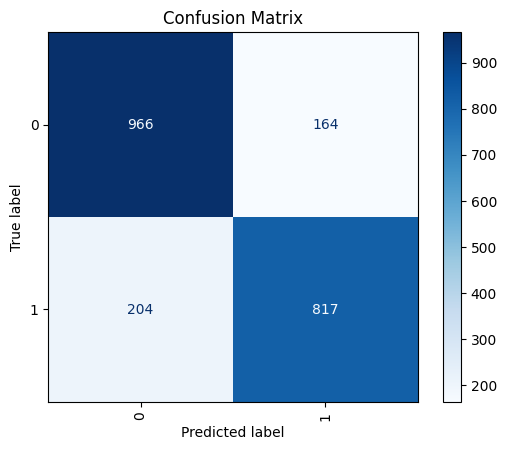

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [56]:
#Since I have an acceptable model, I don't need to use any more techniques.

## Predictions on new data

In [ ]:
#Now lets try to predect new data

In [59]:
import os
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create the directory 
os.makedirs('Models', exist_ok=True)

scaler.fit(X_train)

# Save the model and scaler
joblib.dump(model, 'Models/knn_model.joblib')
joblib.dump(scaler, 'Models/scaler.joblib')


['Models/scaler.joblib']

In [69]:
# Load the model and scaler
knn_model = joblib.load('Models/knn_model.joblib')
scaler = joblib.load('Models/scaler.joblib')

#Fits Scaler on the training data
scaler.fit(X_train)

# Prepare new data for prediction
sample1 = {'appearance': 70 ,
          'games_injured': 3 , 
          'award': 5 , 
          'highest_value': 6000000 ,
          'goals_total': 5 ,
          'assists_total': 4 , 
          'yellow_cards_total': 4   
}


sample2 = {'appearance': 100 ,
          'games_injured': 6 , 
          'award': 10 , 
          'highest_value': 7000000000 ,
          'goals_total': 30 ,
          'assists_total': 15 , 
          'yellow_cards_total': 2   
}

# Convert and scale the new data for sample1
scaled_input1 = scaler.transform(np.array([list(sample1.values())]))
# Convert and scale the new data for sample2
scaled_input2 = scaler.transform(np.array([list(sample2.values())]))

# Make predictions
prediction1 = knn_model.predict(scaled_input1)
prediction2 = knn_model.predict(scaled_input2)


## Predictions on new data
print("Frist prediction:", prediction1[0])
print("Second prediction:", prediction2[0])


Frist prediction: 0
Second prediction: 1


In [53]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, train_test_split

In [54]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, 
    train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
    scoring='accuracy'
)

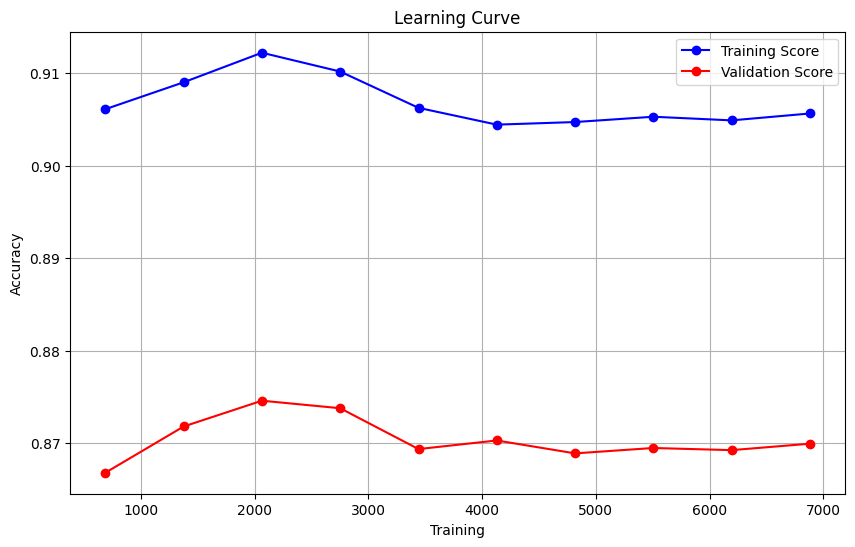

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='red', label='Validation Score')

plt.title('Learning Curve')
plt.xlabel('Training')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
